# Sales prices of houses in King County (AA Team)


# Introduction


The objective of this kernel is to create a **linear regression model** for a given dataset( House Sales in King County, USA). The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

**Linear Regression Analysis** consists of more than just fitting a linear line through a cloud of data points.  It consists of 3 stages – (1) analyzing the correlation and directionality of the data, (2) estimating the model, i.e., fitting the line, and (3) evaluating the validity and usefulness of the model.

(1) First import the file, perform data preprocessing(removing null values, changing data type, etc) and then perform EDA(Exploratory Data Analysis) for the data. Find if there are any correlations between the data.

(2) Now we create a base model ABC, create required abstract classes. Create linearmodel class which is sub class of ABC class. Define the required methods. Now we create two classes **least squares** and **least mean squares** which are linear regression classes. We intialize the models, create train method to train the data. We intialize the train step so that the line can take the no of steps required.

(3) In order to know that the created model is vaild, we create plots to see the predicted line and the points where the required value should be vaild. We know that the model is valid and is useful when it passes the preliminary test, where the least mean square and least squares are verified with various data.


# Data

## Description

In this dataset we have to predict the **sales price of houses in King County, Seattle**. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.** 

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles. 

Now, find if there are any null values. Luckily, there are no null values which helps us in getting the accurate model. We drop the unnecessary columns ike 'lat', 'long', 'view'. **There is an outlier in the given data.** Although it is not exactly a outlier, i would like to remove the value so that we can obtain better graph. The **no of bedrooms is '33'** for one observation. I removed that value. 

The **date is in object format, so it is converted into date format** using pandas. Now, the graphs are plotted for better understanding or better analysis. The graphs like relplot, boxplot, heatplot, lineplot, catplot are used for analysis.


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score

from time import time

In [2]:
#read the csv file into dataframe
df=pd.read_csv('kc_house_data.csv')


In [3]:
#getting to know about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
#view dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
#checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Check outliers


# First use boxplot 


<AxesSubplot:xlabel='price'>

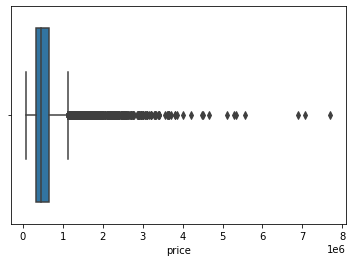

In [7]:
sns.boxplot(x = df.columns[2], data = df)

In [8]:
df.bathrooms = round(df.bathrooms)


<AxesSubplot:xlabel='bedrooms'>

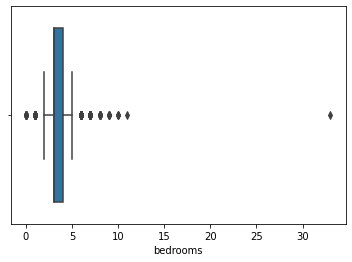

In [9]:
sns.boxplot(x = df.columns[3], data = df)

<AxesSubplot:xlabel='bathrooms'>

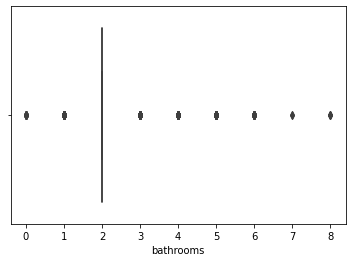

In [10]:
sns.boxplot(x = df.columns[4], data = df)

In [11]:
df.bathrooms.value_counts()

2.0    13851
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='sqft_living'>

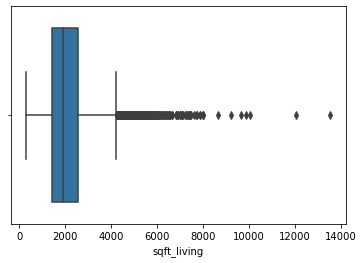

In [12]:
sns.boxplot(x = df.columns[5], data = df)

<AxesSubplot:xlabel='sqft_lot'>

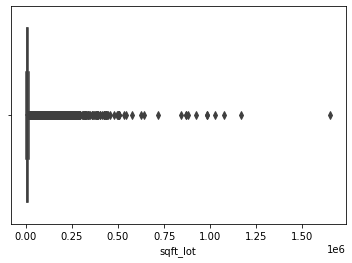

In [13]:
sns.boxplot(x = df.columns[6], data = df)

<AxesSubplot:xlabel='floors'>

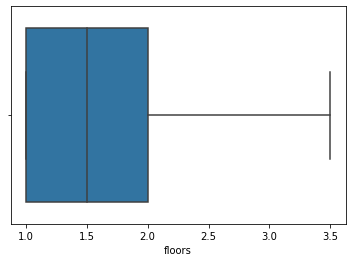

In [14]:
sns.boxplot(x = df.columns[7], data = df)

<AxesSubplot:xlabel='waterfront'>

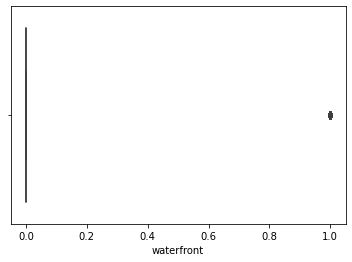

In [15]:
sns.boxplot(x = df.columns[8], data = df)

<AxesSubplot:xlabel='view'>

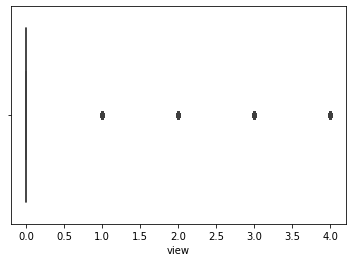

In [16]:
sns.boxplot(x = df.columns[9], data = df)

<AxesSubplot:xlabel='condition'>

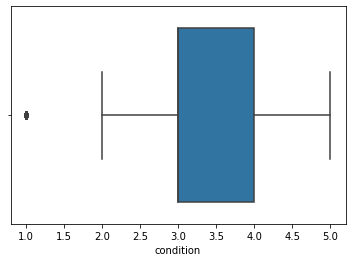

In [17]:
sns.boxplot(x = df.columns[10], data = df)

<AxesSubplot:xlabel='grade'>

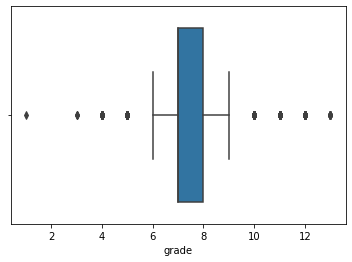

In [18]:
sns.boxplot(x = df.columns[11], data = df)

<AxesSubplot:xlabel='sqft_above'>

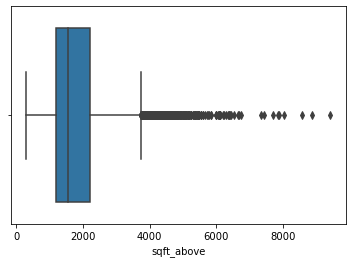

In [19]:
sns.boxplot(x = df.columns[12], data = df)

<AxesSubplot:xlabel='sqft_basement'>

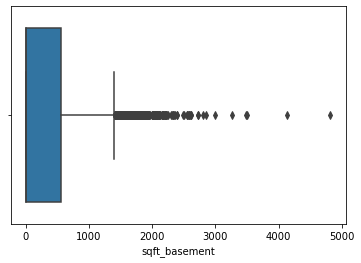

In [20]:
sns.boxplot(x = df.columns[13], data = df)

<AxesSubplot:xlabel='yr_built'>

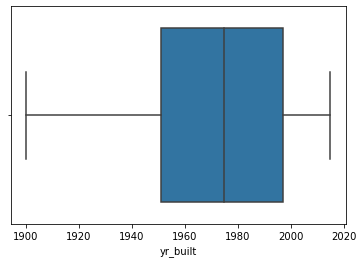

In [21]:
sns.boxplot(x = df.columns[14], data = df)

<AxesSubplot:xlabel='yr_renovated'>

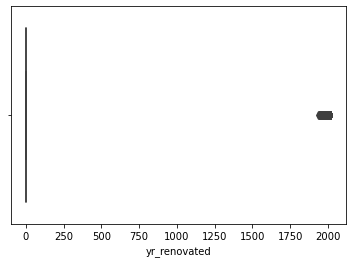

In [22]:
sns.boxplot(x = df.columns[15], data = df)

<AxesSubplot:xlabel='zipcode'>

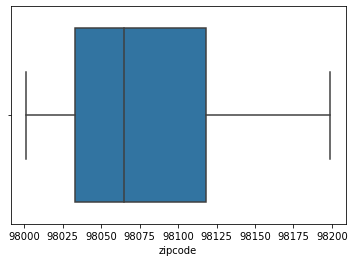

In [23]:
sns.boxplot(x = df.columns[16], data = df)

<AxesSubplot:xlabel='lat'>

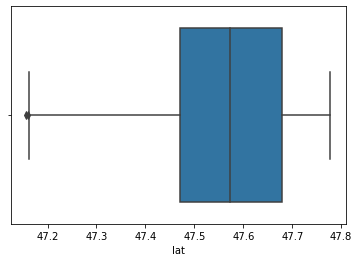

In [24]:
sns.boxplot(x = df.columns[17], data = df)

<AxesSubplot:xlabel='long'>

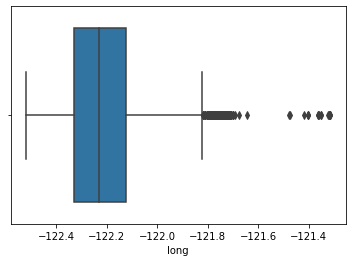

In [25]:
sns.boxplot(x = df.columns[18], data = df)

<AxesSubplot:xlabel='sqft_living15'>

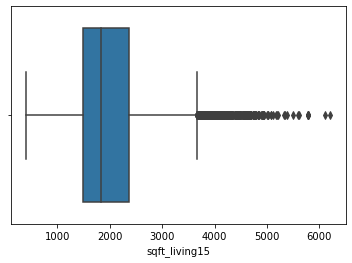

In [26]:
sns.boxplot(x = df.columns[19], data = df)

<AxesSubplot:xlabel='sqft_lot15'>

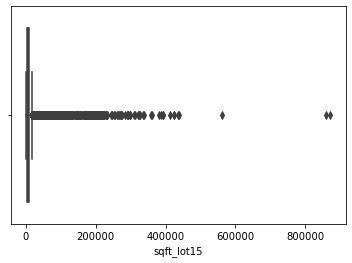

In [27]:
sns.boxplot(x = df.columns[20], data = df)

In [28]:
originalsize = len(df)

originalsize

21613

In [29]:
# Define function to remove outliers
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']
for c in columns:
    df_mean, df_std = np.mean(df[c]), np.std(df[c])
    cut_off = df_std * 3
    lower, upper = df_mean - cut_off, df_mean + cut_off
    df = df[df[c] >= lower]
    df = df[df[c] <= upper]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [30]:
df.bathrooms.value_counts()

2.0    13022
1.0     3771
3.0     2086
4.0      685
0.0        5
Name: bathrooms, dtype: int64

In [31]:
# See size of df now
newsize = len(df)
newsize
round((originalsize-newsize)/originalsize*100,2)

9.46

In [32]:
#conevrting data column into float type

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [33]:
#formatting the unncessary values in data column
df['date']=[x[:8] for x in df['date']]
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:
#changing date column into date type using pandas
df['date']=pd.to_datetime(df["date"])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [35]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19569 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19569 non-null  int64         
 1   date           19569 non-null  datetime64[ns]
 2   price          19569 non-null  float64       
 3   bedrooms       19569 non-null  int64         
 4   bathrooms      19569 non-null  float64       
 5   sqft_living    19569 non-null  int64         
 6   sqft_lot       19569 non-null  int64         
 7   floors         19569 non-null  float64       
 8   waterfront     19569 non-null  int64         
 9   view           19569 non-null  int64         
 10  condition      19569 non-null  int64         
 11  grade          19569 non-null  int64         
 12  sqft_above     19569 non-null  int64         
 13  sqft_basement  19569 non-null  int64         
 14  yr_built       19569 non-null  int64         
 15  yr_renovated   1956

# Plots for understanding or Analysis

A plot is a graphical technique for representing a data set, usually as a graph showing the relationship between two or more variables. Graphs are a visual representation of the relationship between variables, which are very useful for humans who can then quickly derive an understanding which may not have come from lists of values.

We have plotted the graphs like **replot, boxplot, heatmap, lineplot, catplot, 3d graph**. We plotted graphs between price, bedrooms, bathrooms, sqft_living, sqft_lot, date of purchase, condition for analyzing the data. Relplot is used to find the relation between bedrooms and price. We plotted boxplot for further understanding. A graph is plotted between bathrooms and price. Heatmap is plotted between all the columns for finding correlation. 

> A plot is plotted for finding dates vs price. Graphs are plotted for finding the relationship between sqft_living vs price, sqft_lot vs price, condition vs price.

In [36]:
df['price'].describe().round(3)

count      19569.000
mean      493212.753
std       256775.281
min        82000.000
25%       315000.000
50%       437000.000
75%       606500.000
max      2903000.000
Name: price, dtype: float64

## Location
Location is key when it comes to real estate. Our first question seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.
As a starting point, let us create a scatterplot using latitude and longitude features.


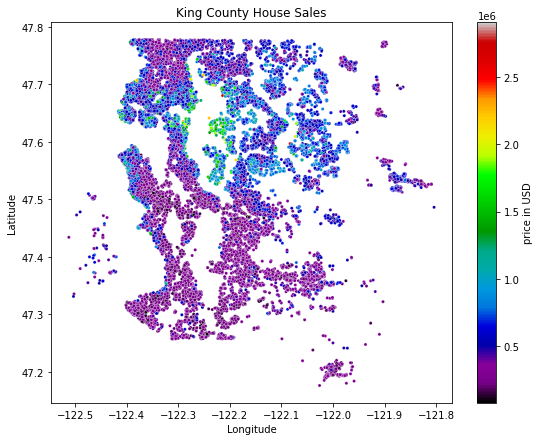

In [37]:
# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df['long'], y = df['lat'], hue = df['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df)

norm = plt.Normalize(df['price'].min(), df['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

From this visualisation we can already draw initial insights based on the houses' geographical locations. The highest house prices are concentrated in the area with latitude around 47.6 and longitude around -122.25. There is a disparity with southern locations achieving lower house prices.

However there is no context to help us! We would need an underlying map to understand where the cities, highways, bodies of water etc. arelocated. It is difficult to draw meaningful conclusions with this visualisation alone.

Whilst we could define quadrants using the latitude and longitude, let us seek to plot the houses on a map instead.

<AxesSubplot:>

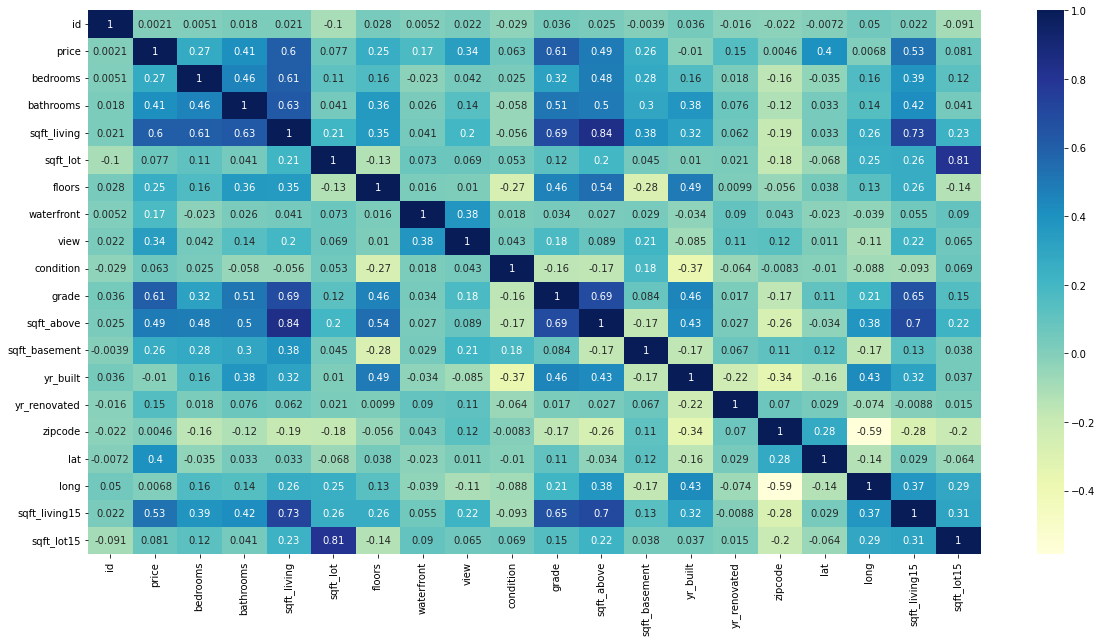

In [38]:
#heatmap for all the required features for correlation

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

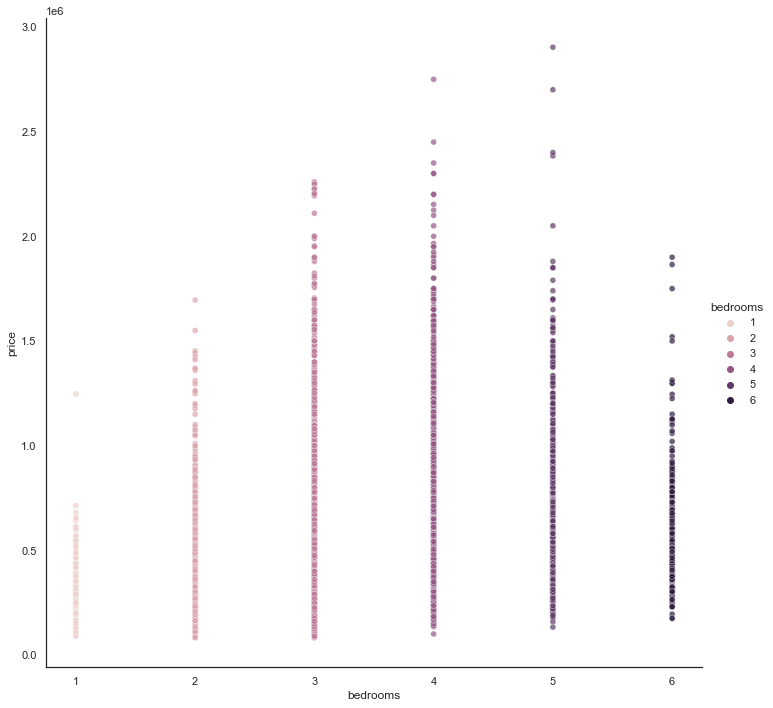

In [39]:
#replot for bedrooms and price
sns.set(style='white')
sns.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=df)

bedrooms
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
5    AxesSubplot(0.125,0.2;0.775x0.68)
6    AxesSubplot(0.125,0.2;0.775x0.68)
Name: price, dtype: object

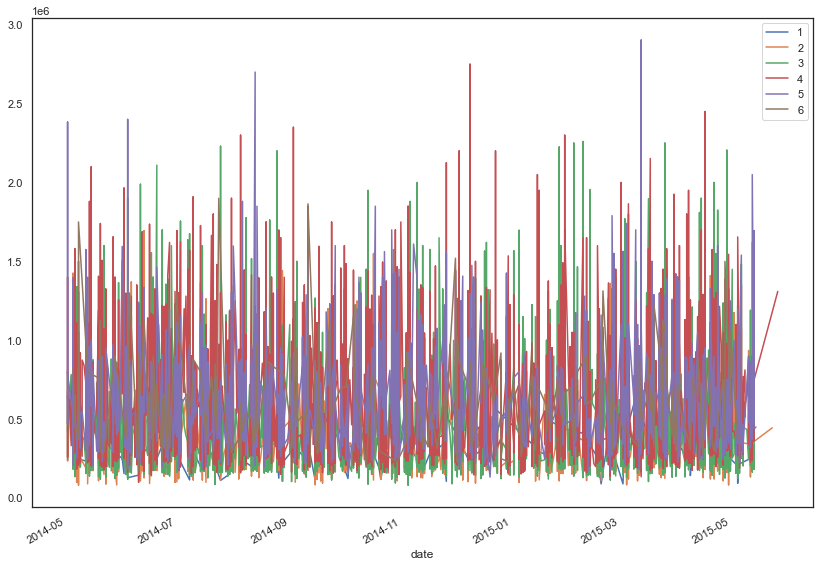

In [40]:
#graph for dates,price and bedrooms
fig,ax=plt.subplots(figsize=(14,10))
df.set_index('date').groupby('bedrooms')['price'].plot(legend=True)

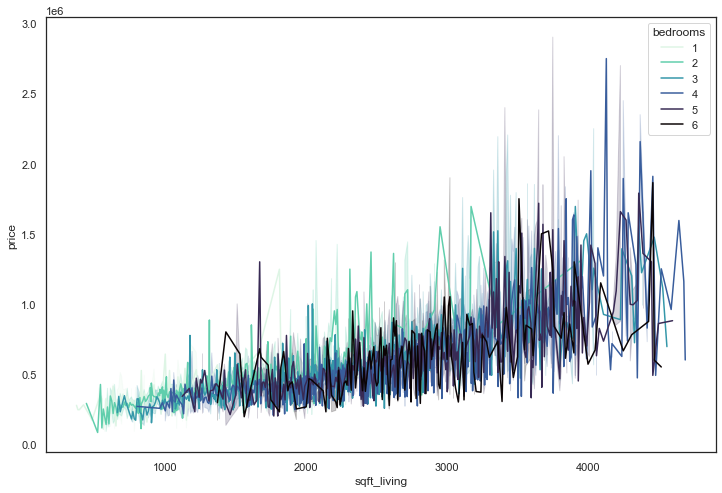

In [41]:
#lineplot for sqft living and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_living',y='price',data=df,hue='bedrooms',palette='mako_r')

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

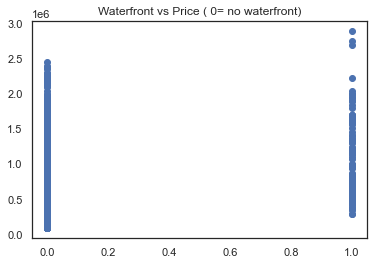

In [42]:
plt.scatter(df.waterfront,df.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

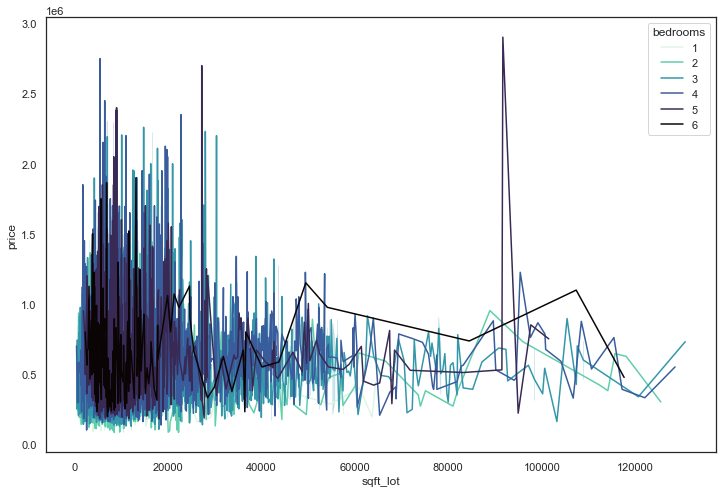

In [43]:
#lineplot for sqft lot and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_lot',y='price',data=df,hue='bedrooms',palette='mako_r')

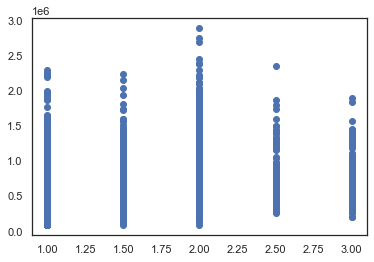

In [44]:
plt.scatter(df.floors,df.price)


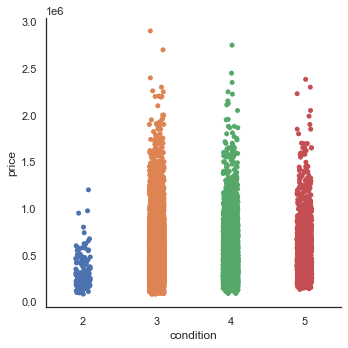

In [45]:
#catplot for condition and price
sns.catplot(x='condition',y='price',data=df)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

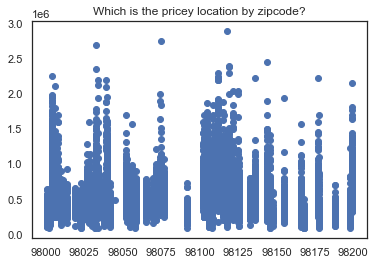

In [46]:
plt.scatter(df.zipcode,df.price)
plt.title("Which is the pricey location by zipcode?")

[(0.0, 250000.0)]

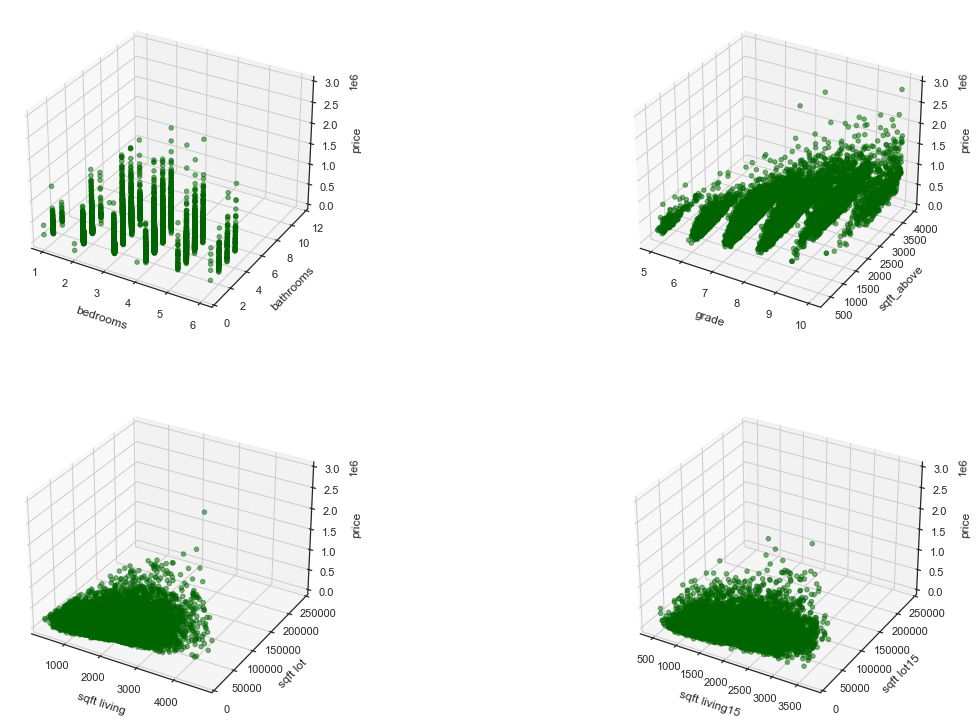

In [47]:
#3d plot
fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(df['bedrooms'],df['bathrooms'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nbedrooms',ylabel='\nbathrooms',zlabel='\nprice')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(df['grade'],df['sqft_above'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\ngrade',ylabel='\nsqft_above',zlabel='\nprice')
#ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nprice')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(df['sqft_living15'],df['sqft_lot15'],df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living15',ylabel='\nsqft lot15',zlabel='\nprice')
ax.set(ylim=[0,250000])

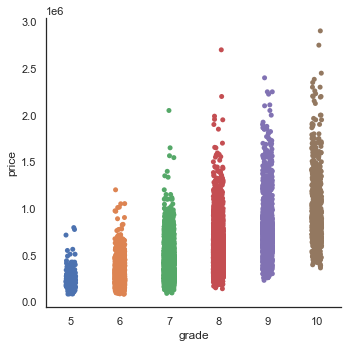

In [48]:
#catplot for condition and price
sns.catplot(x='grade',y='price',data=df)

# Preliminary Observation

After observing the data and graphs carefully, we can observe that the price is mostly dependent on the location, no of bedrooms, bathrooms, sqft living, sqft lot, floors, condition. We can note a few points:

(1) The frequency of no of bedrooms=3,4 is higher than any other bedrooms. The price of these are mostly similar, but some have giher price than usual because of the other features like bathrooms, location, etc.

(2) The heatmap identifies the correlations between the features which help us in identifying how the features are dependent on each other which cannot be known by seeing the data. (Example: sqft living is dependent on grade of the house)

(3) The highest priced houses are sold in months: 9th to 11th. This shows people tend to spend more money on houses which are having more comforts in winter.

(4) Most of the houses have sqft living in between 500 to 6000 irrespective of no of bedrooms. The higer the living space, the higher is the cost.

(5) Price of the house is also dependent on sqft of lot (parking) as most people own their own car.

(6) People are tending to pay less if the condition of the house is bad. They are spending more if the house is in good condition.

(7) The 3d plot gives relationship between multiple features.
Price→Strong Correlation=Sqft living, Very Weak Correlation=Year built
Bedrooms→Moderate Correlation=Sqft living, Very Weak Correlation=Year built
Bathrooms→Strong Correlation=Sqft living, Very Weak Correlation=Sqft Lot
Sqft Living→Strong Correlation=Bathroom, Very Weak Correlation=Sqft Lot
Sqft Lot→Very Weak Correlation=Sqft living, Very Weak Correlation=Year built
Year Built→Moderate Correlation=Bathrooms, Very Weak Correlation=Sqft Lot


# mainnnnnnnn point we see from 0 to 1.5 miliion is the most frequency so after that neeeed more adversting 

In [49]:
# Look at 0.9 percentile
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 800000.0
0.91 percentile: 824000.0
0.92 percentile: 846252.0
0.93 percentile: 870000.0
0.94 percentile: 900000.0
0.95 percentile: 947500.0
0.96 percentile: 999000.0
0.97 percentile: 1100000.0
0.98 percentile: 1235488.8
0.99 percentile: 1430000.0


In [50]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
#regr = linear_model.LinearRegression()
regr = LinearRegression()
new_data = df[['sqft_lot15','sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms','long','lat','floors','zipcode']]
X =new_data.values
y = df.price.values

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:


regr.fit(X_train, y_train)
print(regr.predict(X_test))

[ 24514.99503824 730795.6978624  297829.89460566 ... 477471.13805184
 264624.27953242 808925.76453045]


In [54]:
regr.score(X_test,y_test)

0.6531502487492417

In [55]:
regr.score(X_train,y_train)

0.673231507084056

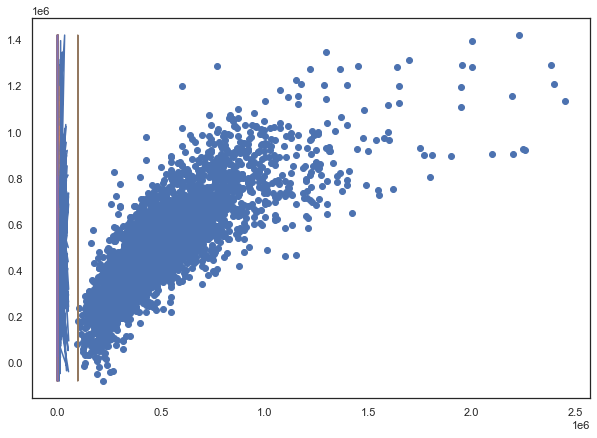

In [56]:

fig,ax=plt.subplots(figsize=(10,7))
plt.scatter(y_test,regr.predict(X_test))
plt.plot(X_test,regr.predict(X_test))  

C:\Users\Galal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


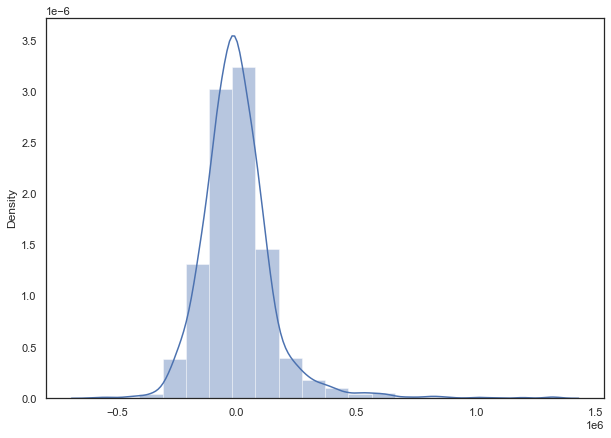

In [57]:
#we plot graph for difference between y test and y prediction
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot((y_test-regr.predict(X_test)),bins=20);

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [59]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(y_test,predictions)
rand_r2=r2_score(y_test,predictions)
mse_rand=mean_squared_error(y_test,predictions)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
gbst=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=gbst.score(X_test,y_test)

pred = gbst.predict(X_test)
exp_est = explained_variance_score(y_test,pred)
gb_r2=r2_score(y_test,pred)
mse_gb=mean_squared_error(y_test,pred)

In [61]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict_ada = ada.predict(X_test)
exp_ada = explained_variance_score(y_test,predict_ada)
ada_r2=r2_score(y_test,predict_ada)
mse_ada=mean_squared_error(y_test,predict_ada)

In [62]:

from sklearn.tree  import DecisionTreeRegressor
decision=DecisionTreeRegressor()
start = time()
decision.fit(X_train, y_train)
end=time()
train_time_dec=end-start
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(y_test,decpredict)
dec_r2 =r2_score(y_test,decpredict)
mse_dec=mean_squared_error(y_test,decpredict)

In [63]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=450, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
start = time()
xgb.fit(X_train, y_train)
end=time()
train_time_x=end-start
xgboost=xgb.score(X_test,y_test)
xgb_pred=xgb.predict(X_test)
exp_x = explained_variance_score(y_test,xgb_pred)
x_r2 =r2_score(y_test,xgb_pred)
mse_x=mean_squared_error(y_test,xgb_pred)

In [64]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree','XGBoost'],
    'Score': [gradient,adab,random,decc,xgboost],
     'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec,exp_x],
      'R2 Score' : [gb_r2,ada_r2,rand_r2,dec_r2,x_r2],
      'Mean Squared Error':[mse_gb,mse_ada,mse_rand,mse_dec,mse_x]})
    
models_cross.sort_values(by='Score', ascending=False)


,Model,Score,Variance Score,R2 Score,Mean Squared Error
4,XGBoost,0.864464,0.864469,0.864464,9.444635e+09
0,Gradient Boosting,0.863699,0.863699,0.863699,9.498004e+09
2,Random Forest,0.841401,0.841409,0.841401,1.105176e+10
3,Decision Tree,0.688907,0.689107,0.688907,2.167814e+10
1,AdaBoost,0.675821,0.692707,0.675821,2.259000e+10


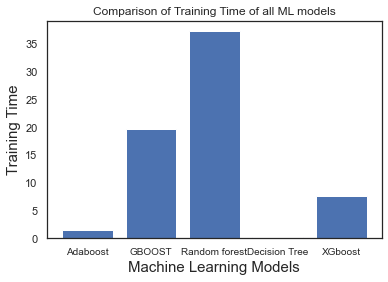

In [65]:

model = ['Adaboost', 'GBOOST', 'Random forest', 'Decision Tree','XGboost']
Train_Time = [
    train_time_ada,
    train_time_g,
    train_time_rand,
    train_time_dec,
    train_time_x
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

# CONCLUSION

# mainnnnnnnn point we see from 0 to 1.6 miliions is the most frequency so after that neeeed more adversting

# Gradient Boosting	is best algorithm
